Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import dataset

In [2]:
fpt_data = pd.read_csv('.\data\FPT.csv')
msn_data = pd.read_csv('.\data\MSN.csv')
pnj_data = pd.read_csv('.\data\PNJ.csv')
vic_data = pd.read_csv('.\data\VIC.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18740\3686014394.py:1: SyntaxWarning: invalid escape sequence '\d'
  fpt_data = pd.read_csv('.\data\FPT.csv')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18740\3686014394.py:2: SyntaxWarning: invalid escape sequence '\d'
  msn_data = pd.read_csv('.\data\MSN.csv')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18740\3686014394.py:3: SyntaxWarning: invalid escape sequence '\d'
  pnj_data = pd.read_csv('.\data\PNJ.csv')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18740\3686014394.py:4: SyntaxWarning: invalid escape sequence '\d'
  vic_data = pd.read_csv('.

Checking dataset is null or not

In [3]:
fpt_data.info()
msn_data.info()
pnj_data.info()
vic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low  

In [4]:
fpt_data.shape

(97406, 8)

Data preprocessing

In [5]:
def preprocess_data(data):
    data['Date/Time'] = pd.to_datetime(data['Date/Time'])
    data = data.set_index('Date/Time')
    data = data[['Close']]
    return data

fpt_data = preprocess_data(fpt_data)
msn_data = preprocess_data(msn_data)
pnj_data = preprocess_data(pnj_data)
vic_data = preprocess_data(vic_data)

In [6]:
fpt_data

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


Creating a target variable

In [7]:
def create_target(data, n_days=1):
    data['Change'] = data['Close'].shift(-n_days) - data['Close']
    data = data.dropna()
    return data

fpt_data = create_target(fpt_data)
msn_data = create_target(msn_data)
pnj_data = create_target(pnj_data)
vic_data = create_target(vic_data)

print(fpt_data.head())
print(msn_data.head())
print(pnj_data.head())
print(vic_data.head())

                     Close  Change
Date/Time                         
2018-12-25 09:15:00  30.89   -0.08
2018-12-25 09:16:00  30.81   -0.07
2018-12-25 09:17:00  30.74    0.00
2018-12-25 09:18:00  30.74    0.00
2018-12-25 09:19:00  30.74    0.00
                     Close  Change
Date/Time                         
2017-12-25 09:15:00   73.1    -0.1
2017-12-25 09:16:00   73.0     0.5
2017-12-25 09:18:00   73.5    -0.4
2017-12-25 09:20:00   73.1    -0.1
2017-12-25 09:21:00   73.0     0.1
                     Close  Change
Date/Time                         
2018-02-28 09:15:00  78.99   -0.05
2018-02-28 09:16:00  78.94   -0.80
2018-02-28 09:19:00  78.14    0.00
2018-02-28 09:20:00  78.14    0.00
2018-02-28 09:21:00  78.14   -0.05
                     Close  Change
Date/Time                         
2018-10-17 09:39:00   98.5     0.0
2018-10-17 09:40:00   98.5     0.1
2018-10-17 09:41:00   98.6     0.0
2018-10-17 09:42:00   98.6     0.1
2018-10-17 09:43:00   98.7     0.0


Feature selection & Spliting the datasets

In [8]:
from sklearn.model_selection import train_test_split

def split_dataset(data):
    X = data[['Close']]
    y = data['Change']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [9]:
FPT_X_train, FPT_X_test, FPT_y_train, FPT_y_test = split_dataset(fpt_data)
MSN_X_train, MSN_X_test, MSN_y_train, MSN_y_test = split_dataset(msn_data)
PNJ_X_train, PNJ_X_test, PNJ_y_train, PNJ_y_test = split_dataset(pnj_data)
VIC_X_train, VIC_X_test, VIC_y_train, VIC_y_test = split_dataset(vic_data)


Scaling Datasets

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
def scale_data(X_train, X_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    return X_train, X_test


In [11]:
FPT_X_train, FPT_X_test = scale_data(FPT_X_train, FPT_X_test)
MSN_X_train, MSN_X_test = scale_data(MSN_X_train, MSN_X_test)
PNJ_X_train, PNJ_X_test = scale_data(PNJ_X_train, PNJ_X_test)
VIC_X_train, VIC_X_test = scale_data(VIC_X_train, VIC_X_test)

Training Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    return model

In [13]:
FPT_model = train_model(FPT_X_train, FPT_y_train)
MSN_model = train_model(MSN_X_train, MSN_y_train)
PNJ_model = train_model(PNJ_X_train, PNJ_y_train)
VIC_model = train_model(VIC_X_train, VIC_y_train)

Predict and evaluate on the testing set

In [ ]:
def predict_data(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, mse

In [ ]:
FPT_y_pred, mse_FPT = predict_data(FPT_model, FPT_X_test, FPT_y_test)
MSN_y_pred, mse_MNS = predict_data(MSN_model, MSN_X_test, MSN_y_test)
PNJ_y_pred, mse_PNJ = predict_data(PNJ_model, PNJ_X_test, PNJ_y_test)
VIC_y_pred, mse_VIC = predict_data(VIC_model, VIC_X_test, VIC_y_test)

In [ ]:
type(FPT_X_test)

numpy.ndarray

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Plot the data

In [ ]:
def plot_results(data, y_test, y_pred, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data.index[-len(y_test):], y_test, label='Actual')
    plt.plot(data.index[-len(y_test):], y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price Change')
    plt.legend()
    plt.show()

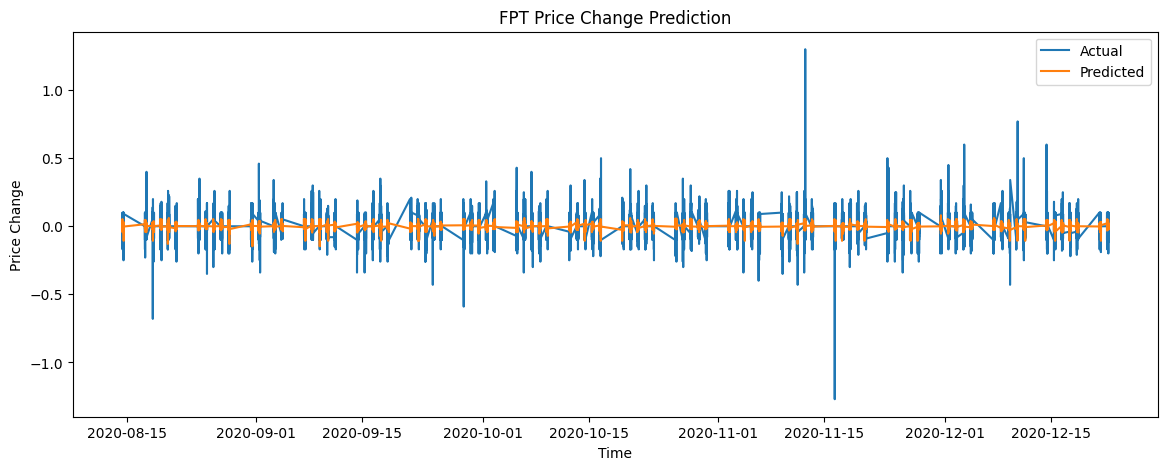

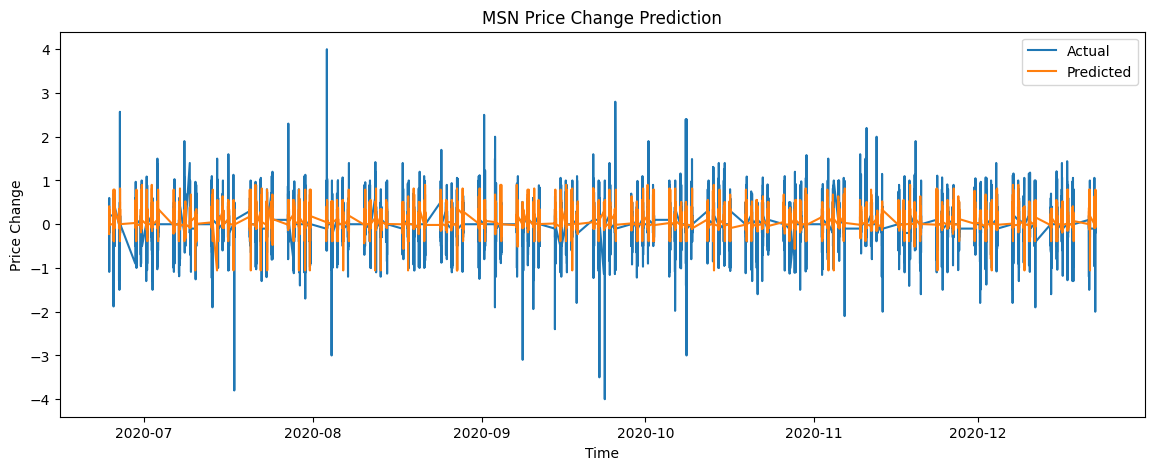

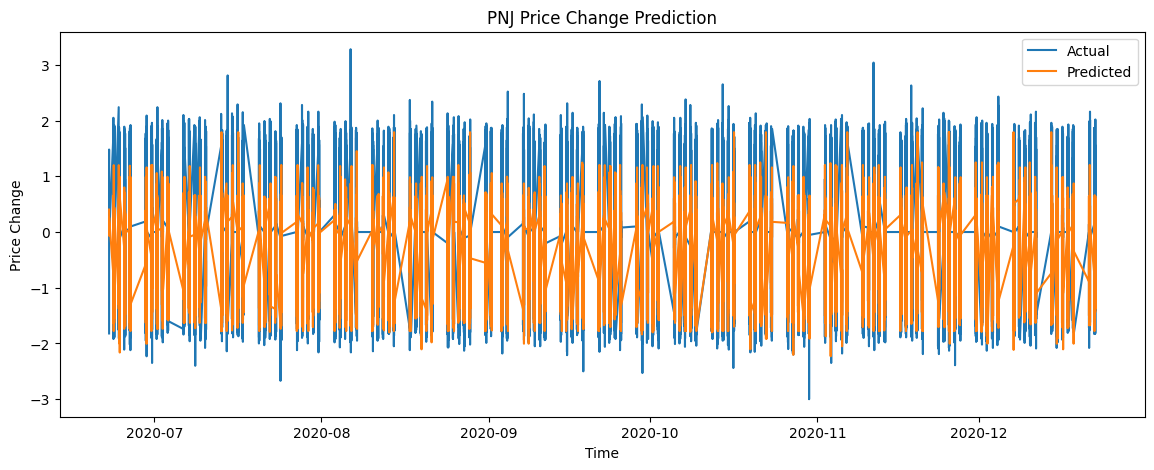

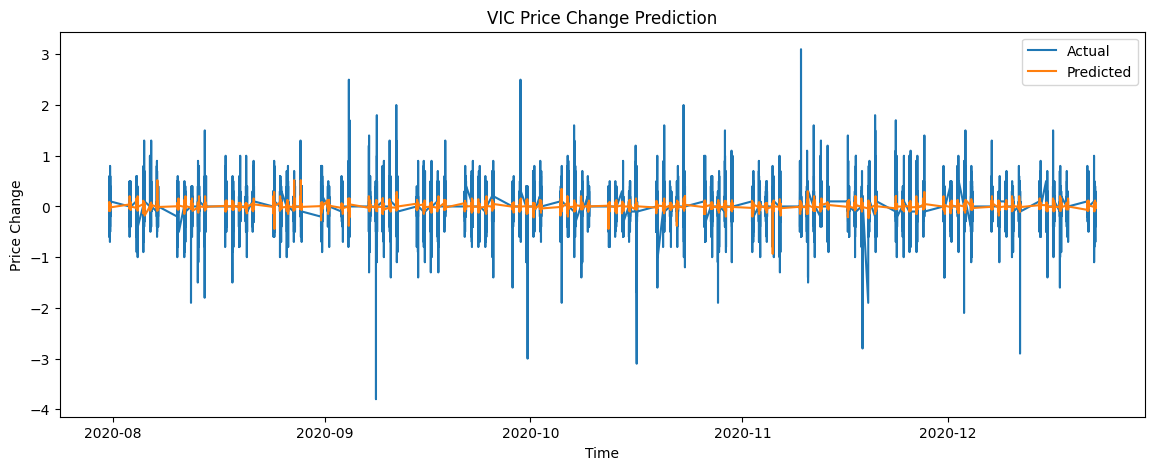

In [ ]:
FPT_plot = plot_results(fpt_data, FPT_y_test, FPT_y_pred, 'FPT Price Change Prediction')
MNS_plot = plot_results(msn_data, MSN_y_test, MSN_y_pred, 'MSN Price Change Prediction')
PNJ_plot = plot_results(pnj_data, PNJ_y_test, PNJ_y_pred, 'PNJ Price Change Prediction')
VIC_plot = plot_results(vic_data, VIC_y_test, VIC_y_pred, 'VIC Price Change Prediction')


Comparing the actual and predicted data

In [ ]:
def show_ex(actual, predicted):
    comparison = pd.DataFrame({'Actual': actual, 'Predicted': predicted,})
    return comparison.head()

In [ ]:
FPT_head = show_ex(FPT_y_test, FPT_y_pred)
MSN_head = show_ex(MSN_y_test, MSN_y_pred)
PNJ_head = show_ex(PNJ_y_test, PNJ_y_pred)
VIC_head = show_ex(VIC_y_test, VIC_y_pred)


In [ ]:
VIC_head

,Actual,Predicted
Date/Time,,
2020-11-23 14:26:00,-0.2,-0.019218
2018-10-31 13:44:00,0.0,-0.008408
2019-03-08 09:36:00,0.1,-0.008963
2020-01-17 09:36:00,-0.6,0.000443
2020-09-22 13:31:00,0.0,-0.010116
